**3 - Neural Networks and Universal Approximation Theorem**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

3.1

(a) Design a NN with one input neuron, one hidden layer, and one output neuron to approximate the bump function shown in Fig. 2b. (up at .4 and down at .6).

**The architecture comprises one input node, one output node, and a hidden layer with two nodes. The input layer connects to each of the hidden layers which both go into the output layer. The input is multiplied by a weight -w (10000) and then a bias of u (.4w) or d (.6w) is added depending on the hidden layer. This is equivalent to adding a bias of .4 or .6 to -x and then multiplying the whole thing by w. We then pass these expressions into sigmoid activations multiplied by a wieght h which is taken to be negative on the "u-layer." In our case the weight on the "u-layer" is -1 and the weight on the "d-layer" is +1. This weight controls the height of the bump. These expressions are then added together for our final result.** 

**The minimum number of neurons in the hidden layer is 2 because you need one sigmoid to controll the going up and another to controll the going down. This is forced upon us by the monotonicity of the sigmoid activation function.** 

C:\Users\zachb\AppData\Local\Temp\ipykernel_13772\994168287.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


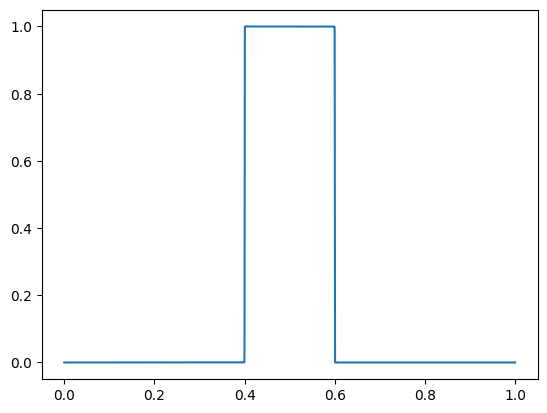

In [48]:
w = 10000
u = .4*w
d = .6*w
h = 1

def sigmoid(x):
    return 1/(1+np.exp(-x))

def NN(x):
    hidden_1 = u-w*x
    hidden_2 = d-w*x
    output = -h*sigmoid(hidden_1) + h*sigmoid(hidden_2) 
    return output

x = np.linspace(0,1,1000000)

plt.plot(x, NN(x))


(b) Specify what parameters in your NN determine (1) the steepness of the step-up and step-down part of the bump, (2) the step-up and step-down locations (x-coordinates), and (3) the height of the bump. 
**The steepness is controlled by w, the step-up location is determined by u (in particular, it's determined by the fraction of w that you take) and similarly the step-down location is determined by d. h controls the height.**

3.2

(a) Design a single layer NN with two inputs (x1, x2), and one output f(x) to approximate a bump function in 2D. The bump goes up at x1 = 0.3 and goes down at x1 = 0.7.

Let (x1, x2) = (x, y). Two input nodes which go into two hidden neurons (each input node connects to both hidden neurons) which pipe into a single output node. From the input to the hidden we have a weight of -10000 for the x input (going into each hidden node) and weight of -1 for the y input (again each hidden node). We then get a bias on x at the first hidden node given by $3000 = .3\times$ weight where .3 is where we want the bump to go up. On y we give a bias of .00001 on both hiddens. On the second hidden node, x gets a bias of $7000 = .7\times$ weight where .7 is where the bump will go down. Then we apply sigmoids going out of the hiddens with weights 1 on the second hidden (the "down" node) and weights -1 on the first hidden (the "up" node).

I interpreted "do not include any edge with zero weight" as "do this without just annulling y."

The minimum number of neurons is again 2. Because we can control x and y behavior in each of the two hidden nodes and again we just need to have an up node and a down node. 

C:\Users\zachb\AppData\Local\Temp\ipykernel_13772\994168287.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


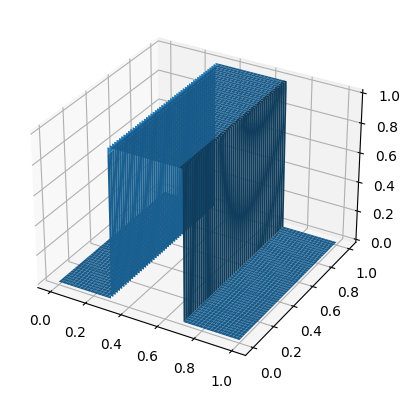

In [86]:
wx = 10000
wy = 1
ux = .3*wx
dx = .7*wx
uy = .00001
dy = .00001
h = 1

def NN2(x,y):
    hidden_1x = ux-wx*x
    hidden_1y = uy-wy*y
    hidden_2x = dx-wx*x
    hidden_2y = dy-wy*y
    output = -h*sigmoid(hidden_1x) + h*sigmoid(hidden_2x) -h* sigmoid(hidden_1y) + h*sigmoid(hidden_2y)
    return output


ax = plt.axes(projection ='3d')
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x,y)
z = NN2(X,Y)
ax.plot_surface(X, Y, z)
plt.show()

(b) Tower. Draw NN. Minimum number of neurons.

A drawing is below.

The minimum number of neurons is 4 in hidden layer 1 and 1 in hidden layer 2. This is because you need 4 for the up and down of each x and y and then an additional neuron to take another sigmoid. You need the additional hidden neuron because the relative height between the middle and the four sides (think of a plus with a taller middle block) would have fixed ratio 2:1.

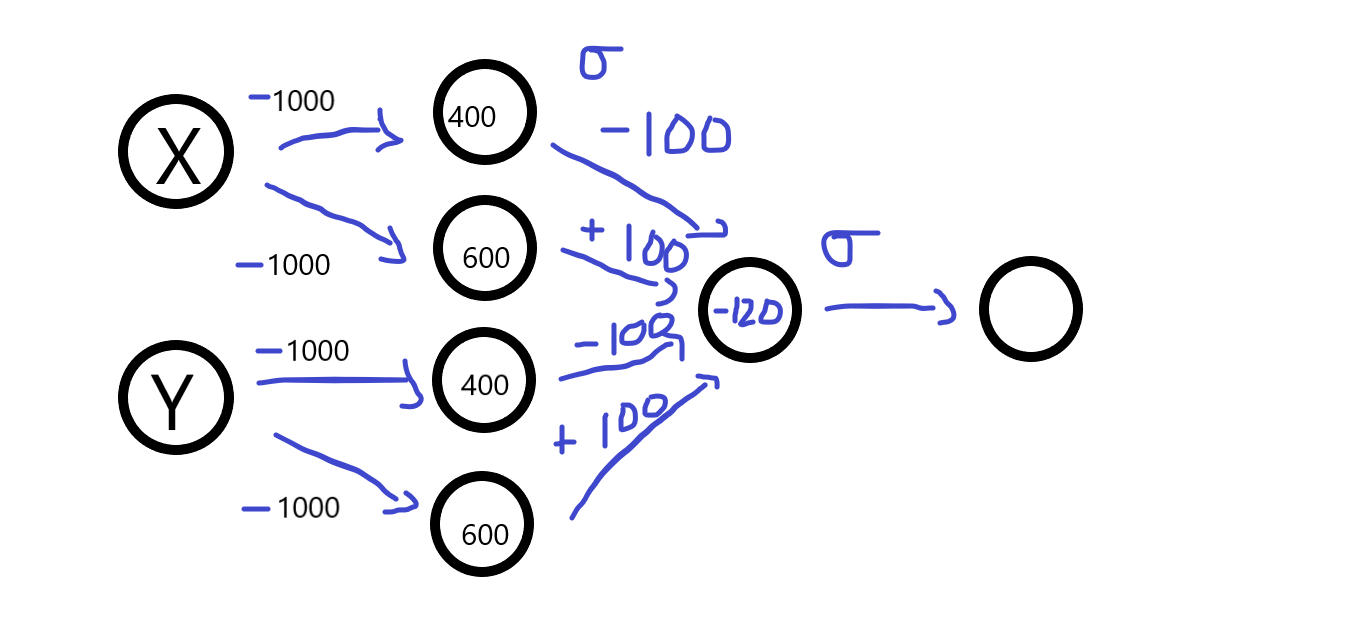

In [166]:
from IPython.display import Image
Image(filename="C:\\Users\\zachb\\Desktop\\tempml.png")


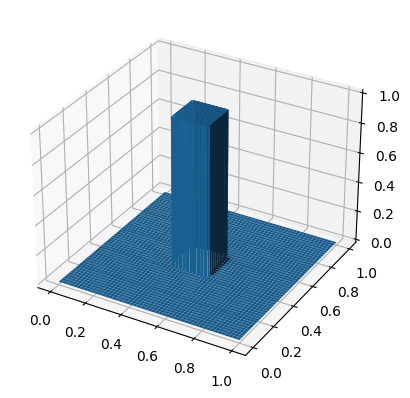

In [165]:
wx1 = 1000
wx2 = 1000
wy1 = 1000
wy2 = 1000
h = 100
b = -120


def NN3(x,y):
    
    hiddenx1 = .4*wx1-wx1*x
    hiddenx2 = .6*wx2-wx2*x
    hiddeny1 = .4*wy1-wy1*y
    hiddeny2 = .6*wy2-wy2*y
    
    hidden2 = h*(-sigmoid(hiddeny1) + sigmoid(hiddeny2) - sigmoid(hiddenx1) + sigmoid(hiddenx2)) + b

    output = sigmoid(hidden2) 

    return output

   


ax = plt.axes(projection ='3d')
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x,y)
z = NN3(X,Y)
ax.plot_surface(X, Y, z)
plt.show()

(c) We'd like to compute the worst case scenario for a given base size. Let our base be a square of area $a^2$. The worst function has constant gradient $(t,t)$. This function is just the plane given by $f(x,y)=tx+ty$. We get to choose the heights of our towers. Let this height be the value of $f$ at the midpoint of the tower. Then the largest difference between the tower and the function is at the two corners where the total height can change by $2\times ta/2=ta$. If we'd like $ta\leq\varepsilon$, we need to take $a\leq\frac{\varepsilon}{t}$. Since we're filling a unit square with towers, we have $1/a^2$ towers. So we need $1/a^2\geq\frac{t^2}{\varepsilon^2}$. In particular, the minimum number of tower functions is $\frac{t^2}{\varepsilon^2}$.

You need $5$ hidden neurons for one tower so you need $5\times \frac{t^2}{\varepsilon^2}$ hidden neurons. 